S Tse  
8/30/19  

Notebook to explore new Tillimook Hazus output provided on 8/27/19 by NYAMIT

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import fiona
import contextily as ctx
import seaborn as sns
os.environ['PROJ_LIB']=r"C:\Users\Scott\Anaconda3\Library\share"
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
#load data as dataframe
aebm_cascadia = pd.read_excel('../data/raw/HazusAEBM_CascadiaResults.xlsx')

In [3]:
aebm_cascadia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27371 entries, 0 to 27370
Data columns (total 80 columns):
eqAebmId      27371 non-null object
Name          27371 non-null object
ProfileNam    27371 non-null object
Tract         27371 non-null int64
Address       0 non-null float64
City          0 non-null float64
State         0 non-null float64
Zipcode       0 non-null float64
DayOccupan    27371 non-null int64
NightOccup    27371 non-null int64
BldgArea      27371 non-null int64
BldgValue     27371 non-null int64
ContentVal    27371 non-null float64
BusinessIn    27371 non-null int64
Business_1    27371 non-null int64
WagesPaid     27371 non-null int64
Relocation    27371 non-null int64
RentalCost    27371 non-null int64
RatioOwner    27371 non-null int64
Latitude      27371 non-null float64
Longitude     27371 non-null float64
Comment       0 non-null float64
ESRI_OID      27371 non-null int64
eqAebmId_1    27371 non-null object
Foundation    0 non-null float64
SoilType      2737

In [4]:
aebm_cascadia.head()

,eqAebmId,Name,ProfileNam,Tract,Address,City,State,Zipcode,DayOccupan,NightOccup,BldgArea,BldgValue,ContentVal,BusinessIn,Business_1,WagesPaid,Relocation,RentalCost,RatioOwner,Latitude,Longitude,Comment,ESRI_OID,eqAebmId_1,Foundation,SoilType,LqfSusCat,LndSusCat,WaterDepth,Distance,Intersecti,Intersec_1,Intersec_2,PGA,PGV,Sa03,Sa10,LqfSettlPG,LqfSprPGD,LqfProb,LndProb,LndPGD,SufFltRupt,SurfFltRup,StrPDsNone,StrPDsSlig,StrPDsMode,StrPDsExte,StrPDsComp,NsaPDsNone,NsaPDsSlig,NsaPDsMode,NsaPDsExte,NsaPDsComp,NsdPDsNone,NsdPDsSlig,NsdPDsMode,NsdPDsExte,NsdPDsComp,CasDayLvl1,CasDayLvl2,CasDayLvl3,CasDayLvl4,CasNightLv,CasNight_1,CasNight_2,CasNight_3,LossStruct,LossNonStr,LossNonS_1,LossConten,LossBusInv,LossTotalB,LossReloca,LossRental,LossBusInc,LossWage,LossTotBus,LossTotEco,ESRI_OID_1
0,OR000001,OR001008,RES1W1HC0,41057960100,NaN,NaN,NaN,NaN,0,1,1098,96600,48300.0,0,0,0,0,0,0,45.695665,-123.809382,NaN,10823,OR000001,NaN,D,3,1,0,0,0.535203,0.381839,0.437532,0.326145,11.4215,0.739075,0.306425,0.2,31.9505,0.1,0.00,0.00000,2787.19,0.5,0.4195,0.3902,0.0863,0.0831,0.0206,0.3335,0.3358,0.1890,0.1184,0.0230,0.4212,0.2669,0.1929,0.0944,0.0243,0.000000,0.000000,0.000000,0.000000,0.002488,0.000432,0.000021,0.000034,1785.0714,4642.9824,2161.1352,2603.7564,0,11192.9454,0,0,0,0,0,11192.9454,10323
1,OR000002,OR001009,AGR1S3PC0,41057960100,NaN,NaN,NaN,NaN,5,0,1440,22640,22600.0,0,0,0,0,0,0,45.694994,-123.818328,NaN,21853,OR000002,NaN,C,0,7,0,0,3.977800,0.265112,0.200000,0.330225,11.5821,0.749615,0.310760,0.0,0.0000,0.0,0.15,5.51101,2787.19,0.5,0.0153,0.0225,0.1477,0.3750,0.4393,0.1640,0.1949,0.1087,0.1942,0.3379,0.0252,0.0498,0.2279,0.2575,0.4393,0.153172,0.036545,0.002209,0.003527,0.000000,0.000000,0.000000,0.000000,6714.0233,1028.6326,4281.9236,5082.3784,0,17106.9579,0,0,0,0,0,17106.9579,21846
2,OR000003,OR001010,RES1W1MC0,41057960100,NaN,NaN,NaN,NaN,1,2,2220,129056,64500.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,15205,OR000003,NaN,D,3,1,0,0,0.584801,0.371591,0.413808,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.3834,0.3468,0.1543,0.0916,0.0237,0.2619,0.3399,0.2352,0.1385,0.0242,0.3871,0.2661,0.2190,0.0966,0.0310,0.002909,0.000510,0.000025,0.000039,0.005818,0.001020,0.000049,0.000078,2780.6277,6873.6516,3299.5877,3991.5180,0,16945.3850,0,0,0,0,0,16945.3850,14832
3,OR000004,OR001011,RES1W1LC0,41057960100,NaN,NaN,NaN,NaN,0,1,1040,60459,30200.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,7196,OR000004,NaN,D,3,1,0,0,0.823160,0.355740,0.382105,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.2663,0.3335,0.2398,0.1333,0.0268,0.1878,0.3237,0.2895,0.1676,0.0312,0.2749,0.2479,0.2922,0.1343,0.0504,0.000000,0.000000,0.000000,0.000000,0.003721,0.000626,0.000028,0.000044,1756.3460,4586.6616,1882.8263,2271.4024,0,10497.2363,0,0,0,0,0,10497.2363,6816
4,OR000005,OR001012,AGR1S3LC0,41057960100,NaN,NaN,NaN,NaN,2,0,576,33485,33400.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,16188,OR000005,NaN,D,3,1,0,0,2.812460,0.264688,0.200000,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.0430,0.0631,0.2525,0.4180,0.2231,0.2387,0.2829,0.1575,0.1474,0.1733,0.0480,0.1049,0.3531,0.2706,0.2231,0.036428,0.007968,0.000453,0.000721,0.000000,0.000000,0.000000,0.000000,7090.4488,1014.1368,3674.6673,4482.4136,0,16261.6665,0,0,0,0,0,16261.6665,15834


In [5]:
# convert from df to geodataframe
aebm_cascadia_gdf = gpd.GeoDataFrame(
    aebm_cascadia, geometry=gpd.points_from_xy(aebm_cascadia.Longitude, aebm_cascadia.Latitude))

In [6]:
aebm_cascadia_gdf.head(20)

,eqAebmId,Name,ProfileNam,Tract,Address,City,State,Zipcode,DayOccupan,NightOccup,BldgArea,BldgValue,ContentVal,BusinessIn,Business_1,WagesPaid,Relocation,RentalCost,RatioOwner,Latitude,Longitude,Comment,ESRI_OID,eqAebmId_1,Foundation,SoilType,LqfSusCat,LndSusCat,WaterDepth,Distance,Intersecti,Intersec_1,Intersec_2,PGA,PGV,Sa03,Sa10,LqfSettlPG,LqfSprPGD,LqfProb,LndProb,LndPGD,SufFltRupt,SurfFltRup,StrPDsNone,StrPDsSlig,StrPDsMode,StrPDsExte,StrPDsComp,NsaPDsNone,NsaPDsSlig,NsaPDsMode,NsaPDsExte,NsaPDsComp,NsdPDsNone,NsdPDsSlig,NsdPDsMode,NsdPDsExte,NsdPDsComp,CasDayLvl1,CasDayLvl2,CasDayLvl3,CasDayLvl4,CasNightLv,CasNight_1,CasNight_2,CasNight_3,LossStruct,LossNonStr,LossNonS_1,LossConten,LossBusInv,LossTotalB,LossReloca,LossRental,LossBusInc,LossWage,LossTotBus,LossTotEco,ESRI_OID_1,geometry
0,OR000001,OR001008,RES1W1HC0,41057960100,NaN,NaN,NaN,NaN,0,1,1098,96600,48300.0,0,0,0,0,0,0,45.695665,-123.809382,NaN,10823,OR000001,NaN,D,3,1,0,0,0.535203,0.381839,0.437532,0.326145,11.4215,0.739075,0.306425,0.2,31.9505,0.1,0.00,0.00000,2787.19,0.5,0.4195,0.3902,0.0863,0.0831,0.0206,0.3335,0.3358,0.1890,0.1184,0.0230,0.4212,0.2669,0.1929,0.0944,0.0243,0.000000,0.000000,0.000000,0.000000,0.002488,0.000432,0.000021,0.000034,1785.0714,4642.9824,2161.1352,2603.7564,0,11192.9454,0,0,0,0,0,11192.9454,10323,POINT (-123.809382 45.695665)
1,OR000002,OR001009,AGR1S3PC0,41057960100,NaN,NaN,NaN,NaN,5,0,1440,22640,22600.0,0,0,0,0,0,0,45.694994,-123.818328,NaN,21853,OR000002,NaN,C,0,7,0,0,3.977800,0.265112,0.200000,0.330225,11.5821,0.749615,0.310760,0.0,0.0000,0.0,0.15,5.51101,2787.19,0.5,0.0153,0.0225,0.1477,0.3750,0.4393,0.1640,0.1949,0.1087,0.1942,0.3379,0.0252,0.0498,0.2279,0.2575,0.4393,0.153172,0.036545,0.002209,0.003527,0.000000,0.000000,0.000000,0.000000,6714.0233,1028.6326,4281.9236,5082.3784,0,17106.9579,0,0,0,0,0,17106.9579,21846,POINT (-123.818328 45.694994)
2,OR000003,OR001010,RES1W1MC0,41057960100,NaN,NaN,NaN,NaN,1,2,2220,129056,64500.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,15205,OR000003,NaN,D,3,1,0,0,0.584801,0.371591,0.413808,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.3834,0.3468,0.1543,0.0916,0.0237,0.2619,0.3399,0.2352,0.1385,0.0242,0.3871,0.2661,0.2190,0.0966,0.0310,0.002909,0.000510,0.000025,0.000039,0.005818,0.001020,0.000049,0.000078,2780.6277,6873.6516,3299.5877,3991.5180,0,16945.3850,0,0,0,0,0,16945.3850,14832,POINT (-123.81846 45.689002)
3,OR000004,OR001011,RES1W1LC0,41057960100,NaN,NaN,NaN,NaN,0,1,1040,60459,30200.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,7196,OR000004,NaN,D,3,1,0,0,0.823160,0.355740,0.382105,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.2663,0.3335,0.2398,0.1333,0.0268,0.1878,0.3237,0.2895,0.1676,0.0312,0.2749,0.2479,0.2922,0.1343,0.0504,0.000000,0.000000,0.000000,0.000000,0.003721,0.000626,0.000028,0.000044,1756.3460,4586.6616,1882.8263,2271.4024,0,10497.2363,0,0,0,0,0,10497.2363,6816,POINT (-123.81846 45.689002)
4,OR000005,OR001012,AGR1S3LC0,41057960100,NaN,NaN,NaN,NaN,2,0,576,33485,33400.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,16188,OR000005,NaN,D,3,1,0,0,2.812460,0.264688,0.200000,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.0430,0.0631,0.2525,0.4180,0.2231,0.2387,0.2829,0.1575,0.1474,0.1733,0.0480,0.1049,0.3531,0.2706,0.2231,0.036428,0.007968,0.000453,0.000721,0.000000,0.000000,0.000000,0.000000,7090.4488,1014.1368,3674.6673,4482.4136,0,16261.6665,0,0,0,0,0,16261.6665,15834,POINT (-123.81846 45.689002)
5,OR000006,OR001013,RES1W1LC0,41057960100,NaN,NaN,NaN,NaN,2,4,3590,67220,33600.0,0,0,0,0,0,0,45.689136,-123.817122,NaN,746,OR000006,NaN,D,3,1,0,0,0.823160,0.355740,0.382105,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.2663,0.3335,0.2398,0.1333,0.0268,0.1878,0.3237,0.2895,0.1676,0.0312,0.2749,0.2479,0.2922,0.1343,0.0504,0.007441,0.001252,0.000056,0.000088,0.014883,0.002504,0.000112,0.000177,1952.7544,5099.5781,2093.3787,2527.1232,0,11672.8344,0,0,0,0,0,11672.8344,303,POINT (-1

In [7]:
# create new columns for building class, type, design level
aebm_cascadia_gdf['occupancy_class'] = aebm_cascadia_gdf['ProfileNam'].str[:4]
aebm_cascadia_gdf['building_type'] = aebm_cascadia_gdf['ProfileNam'].str[4:6]
aebm_cascadia_gdf['DesignLevel'] = aebm_cascadia_gdf['ProfileNam'].str[6:8]

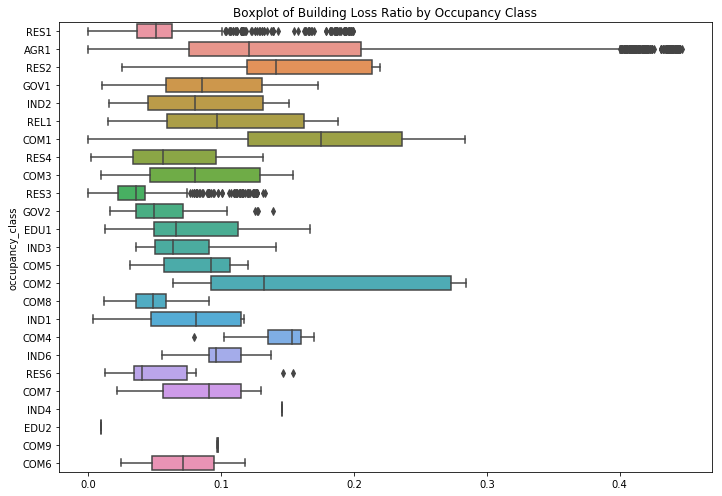

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(y="occupancy_class",
            x=aebm_cascadia_gdf.LossStruct/aebm_cascadia_gdf.BldgValue, 
            data=aebm_cascadia_gdf).set_title('Boxplot of Building Loss Ratio by Occupancy Class')

NOTE: need to verify if loss ratio is LossStruct/BldgValue

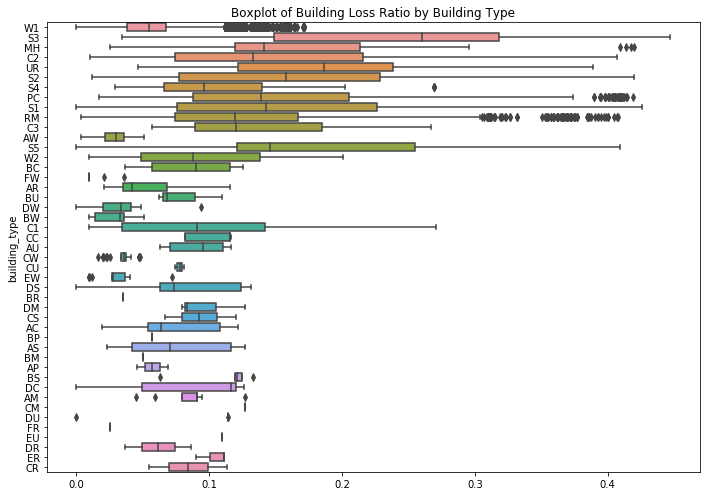

In [9]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(y="building_type",
                 x=aebm_cascadia_gdf.LossStruct/aebm_cascadia_gdf.BldgValue, 
                 data=aebm_cascadia_gdf).set_title('Boxplot of Building Loss Ratio by Building Type')

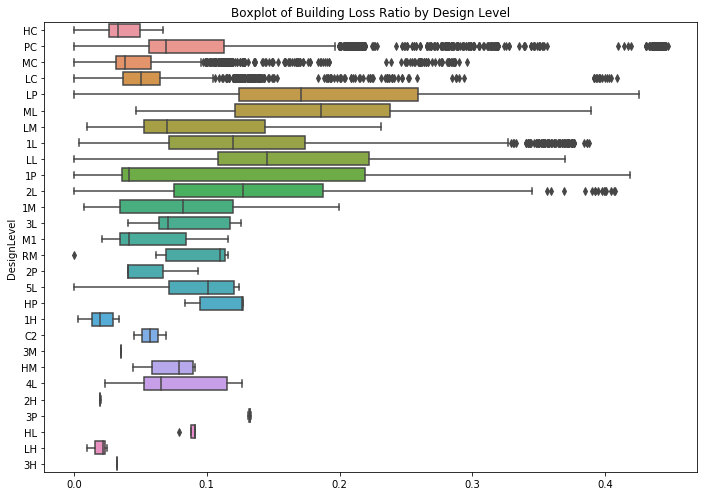

In [10]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax= sns.boxplot(y="DesignLevel",
            x=aebm_cascadia_gdf.LossStruct/aebm_cascadia_gdf.BldgValue, 
            data=aebm_cascadia_gdf).set_title('Boxplot of Building Loss Ratio by Design Level')

In [11]:
# initialize and set crs for basemap to render
aebm_cascadia_gdf.crs = {'init': 'epsg:4326'}
aebm_cascadia_gdf = aebm_cascadia_gdf.to_crs(epsg=3857)

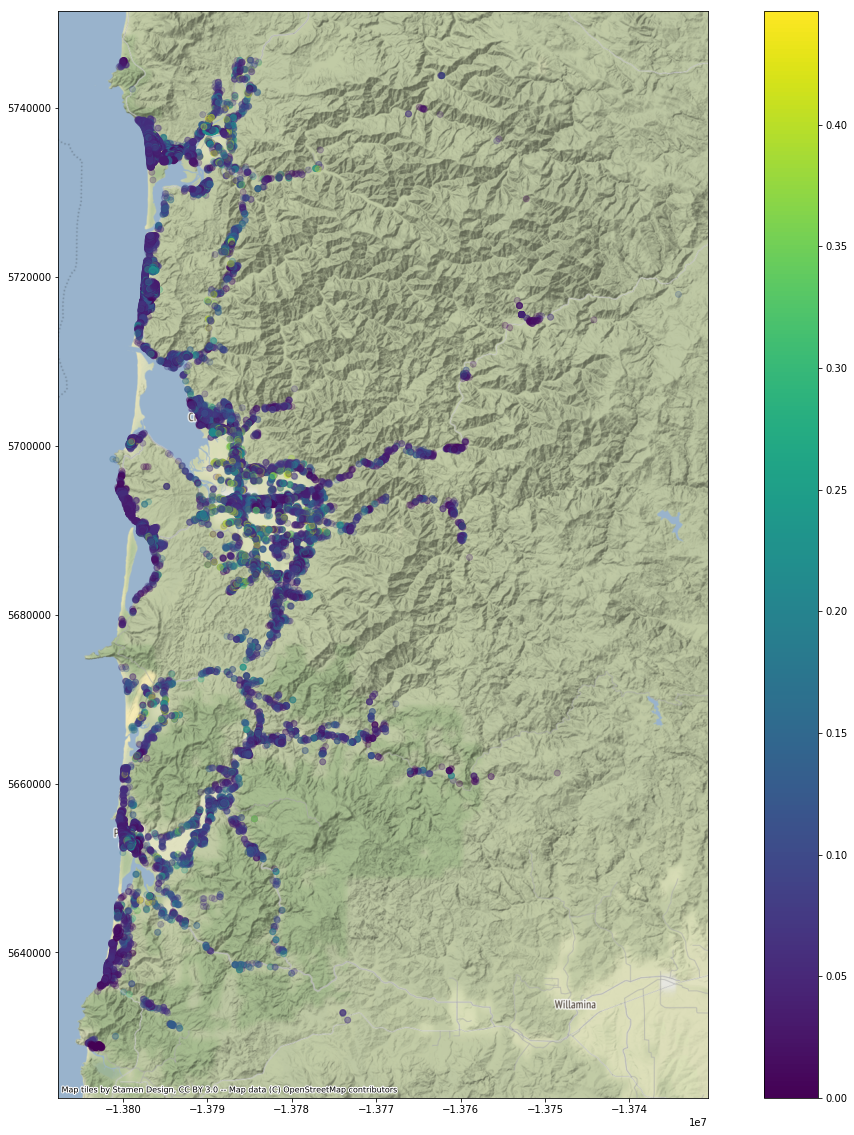

In [12]:
#Loss Ratio of Tillimook Building Points
ax = aebm_cascadia_gdf.plot(column=aebm_cascadia_gdf.LossStruct/aebm_cascadia_gdf.BldgValue,
                            figsize=(20, 20),
                            alpha=0.25,
                            legend=True)
ctx.add_basemap(ax)

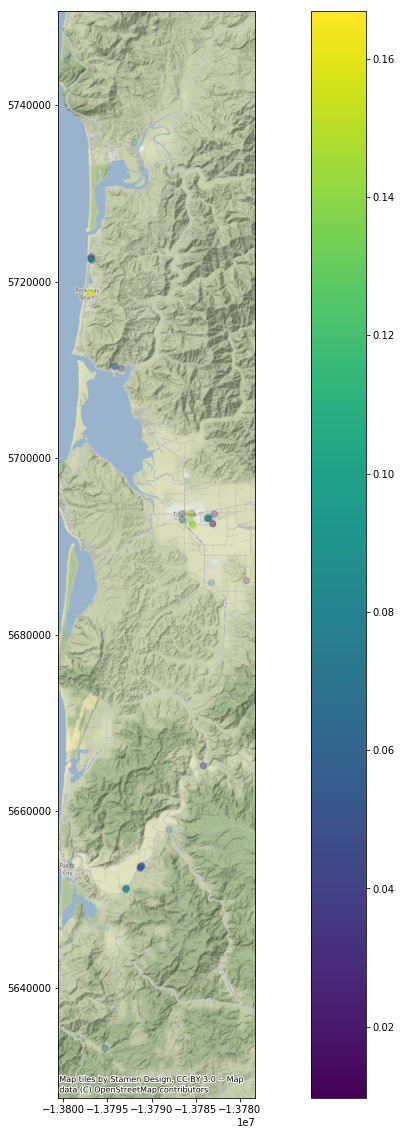

In [13]:
# just look at schools (Occupancy Class containing string 'EDU') loss ratio

schools = aebm_cascadia_gdf[aebm_cascadia_gdf['occupancy_class'].str.contains('EDU')]

ax = schools.plot(
    column=schools.LossStruct/schools.BldgValue,
    figsize=(20, 20),
    alpha=0.25,
    legend=True)

ctx.add_basemap(ax)

Being able to look at an impact metric such as loss ratio by occupancy class was interesting. One idea is to build a visualization of building loss ratio and allow one to filter by each of the building class/building type/ and Design Level dynamically. Could be CARD #1

In [14]:
# export to geoJSON
aebm_cascadia_gdf.to_file("../data/processed/aebm_results.json", driver="GeoJSON")